# **Exploratory Data Analysis**

A detailed Exploratory data analysis (EDA) will be carried out to explore the energy dataset. It involves using statistics and visualizations to analyze and identify trends in data sets. The primary intent of EDA is to help gain an understanding of the data set beyond the formal modeling task and uncover the underlying structure of the dataset. It includes:

- Identifying errors in data sets
- Detecting outliers or anomalous events
- Understand data set variables and the relationship among them 
- Resolve data cleansing and quality issues
- Solve basic data transformation problems

In [1]:
# Import libraries
import os, sys
import numpy as np
import scipy
from scipy.stats import skew, kurtosis, shapiro
from prophet import Prophet
import pandas as pd
import seaborn as sns
from math import sqrt
import datetime as dt
from pmdarima import auto_arima
import sklearn
from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import statsmodels.api as sm
import pandas_profiling
import missingno as msno
import pivottablejs
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,14
import warnings
warnings.filterwarnings("ignore")

In [3]:
electric_load = pd.read_csv(r'C:\Users\hassa\OneDrive\Desktop\spiced_excercises\scikit-cilantro-student-code\week_12\data\LoadProfile_20IPs_2016.csv', delimiter = ';')

In [4]:
electric_load.head()

,Timestamp,C1,C2,C3,C4,C5,C6,C7,C8,C9,...,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20
0,01.01.2016 00:15:00,39,332.16,10.552,416.0,13.12,0.12,6.0,120,70,...,0.0,27.400,29.6,65.0,2462.4,6.200,0.96,25.8,11.46,220
1,01.01.2016 00:30:00,41,321.36,10.300,418.4,13.12,0.24,6.0,116,74,...,0.0,25.448,30.4,66.0,2462.4,6.200,0.90,34.2,11.32,224
2,01.01.2016 00:45:00,39,336.48,10.348,419.6,13.76,0.12,6.0,108,68,...,0.0,27.000,30.4,68.0,2459.2,5.876,0.90,38.4,11.62,226
3,01.01.2016 01:00:00,40,319.20,10.600,422.0,13.44,0.12,8.0,112,80,...,0.0,27.552,29.6,67.0,2451.2,6.200,1.02,19.8,9.40,220
4,01.01.2016 01:15:00,39,322.80,10.148,418.8,13.44,0.24,6.0,120,72,...,272.0,24.900,31.2,66.0,2436.8,6.200,0.90,16.8,10.58,224


In [5]:
electric_load.tail()

,Timestamp,C1,C2,C3,C4,C5,C6,C7,C8,C9,...,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20
35135,31.12.2016 23:00:00,38,353.04,6.252,285.2,12.80,0.36,6.0,132,88,...,304.8,24.600,79.2,50.68,2356.8,5.548,1.38,28.2,12.66,280
35136,31.12.2016 23:15:00,38,357.12,5.752,290.0,13.44,0.24,8.0,140,90,...,308.0,24.500,79.2,50.32,2366.4,6.200,1.02,33.6,13.08,288
35137,31.12.2016 23:30:00,38,360.48,6.400,289.6,12.48,0.36,8.0,140,92,...,306.4,24.752,80.0,46.08,2356.8,5.876,0.96,42.6,12.76,284
35138,31.12.2016 23:45:00,38,365.04,8.948,288.4,13.12,0.36,6.0,136,92,...,302.0,24.200,79.2,46.60,2356.8,6.200,1.02,45.6,12.58,288
35139,01.01.2017 00:00:00,37,360.00,8.848,290.0,12.80,0.12,6.0,128,86,...,305.2,24.700,79.2,53.88,2358.4,5.876,3.84,46.8,11.94,284


In [6]:
electric_load.describe().T

,count,mean,std,min,25%,50%,75%,max
C1,35140.0,66.734206,68.058885,0.0,19.000,39.000,94.000,391.000
C2,35140.0,720.331137,420.748288,0.0,360.000,525.960,1112.220,1793.520
C3,35140.0,23.040545,37.611517,0.0,7.252,9.800,26.348,362.948
C4,35140.0,1921.403369,489.240731,0.0,1712.000,2038.400,2276.000,2797.600
C5,35140.0,43.591540,31.251058,0.0,18.560,25.280,76.560,120.320
C6,35140.0,27.301786,24.514409,0.0,0.480,31.920,48.840,105.960
C7,35140.0,191.985604,415.773350,0.0,6.000,8.000,54.000,1524.004
C8,35140.0,514.810017,266.393689,0.0,280.000,580.000,708.000,1252.000
C9,35140.0,310.068014,317.978625,0.0,76.000,118.000,594.000,1136.000
C10,35140.0,63.546314,31.649928,0.0,31.560,63.600,92.400,174.960


In [7]:
electric_load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35140 entries, 0 to 35139
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  35140 non-null  object 
 1   C1         35140 non-null  int64  
 2   C2         35140 non-null  float64
 3   C3         35140 non-null  float64
 4   C4         35140 non-null  float64
 5   C5         35140 non-null  float64
 6   C6         35140 non-null  float64
 7   C7         35140 non-null  float64
 8   C8         35140 non-null  int64  
 9   C9         35140 non-null  int64  
 10  C10        35140 non-null  float64
 11  C11        35140 non-null  float64
 12  C12        35140 non-null  float64
 13  C13        35140 non-null  float64
 14  C14        35140 non-null  float64
 15  C15        35140 non-null  float64
 16  C16        35140 non-null  float64
 17  C17        35140 non-null  float64
 18  C18        35140 non-null  float64
 19  C19        35140 non-null  float64
 20  C20   

In [8]:
electric_load.shape

(35140, 21)

In [9]:
electric_load.columns

Index(['Timestamp', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9',
       'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19',
       'C20'],
      dtype='object')

In [10]:
# In this dataset there is no missing data
electric_load.apply(lambda x: sum(x.isnull()), axis=0)

Timestamp    0
C1           0
C2           0
C3           0
C4           0
C5           0
C6           0
C7           0
C8           0
C9           0
C10          0
C11          0
C12          0
C13          0
C14          0
C15          0
C16          0
C17          0
C18          0
C19          0
C20          0
dtype: int64

Text(0, 0.5, 'Frequency')

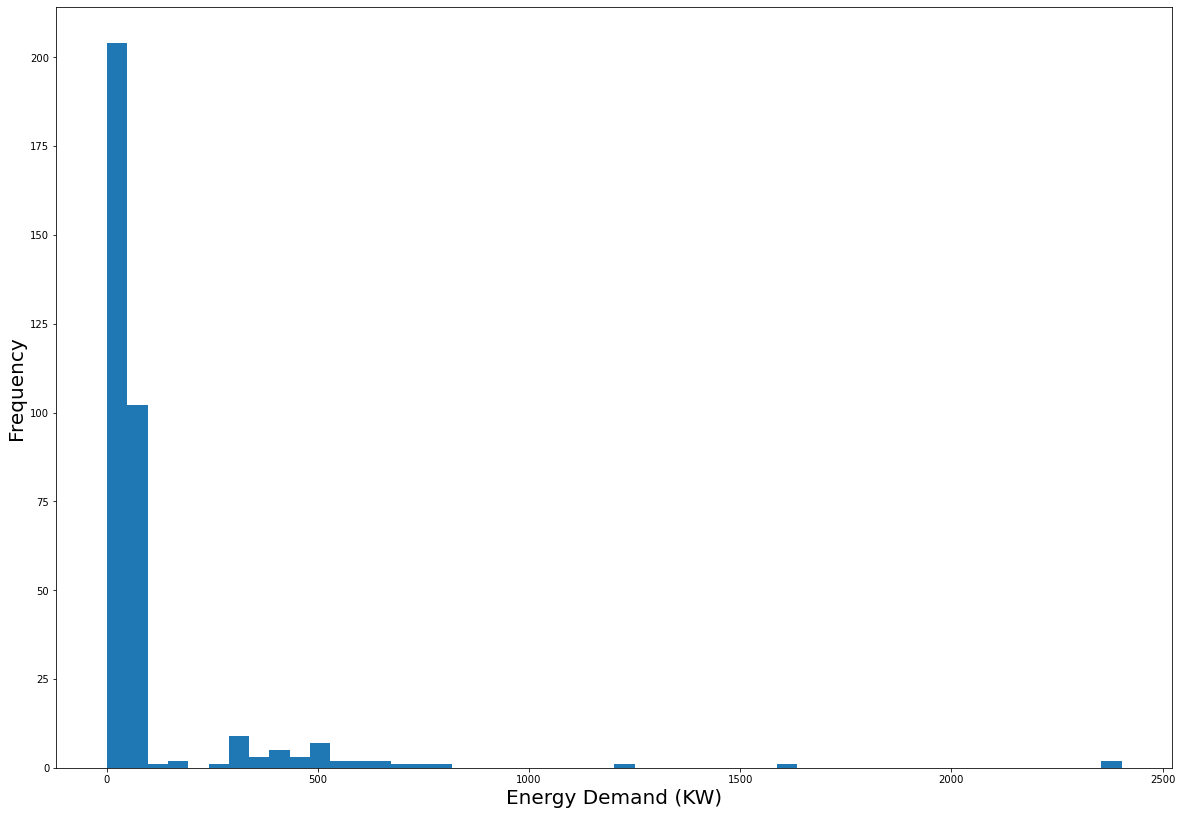

In [11]:
electric_load['C1'].value_counts().head(500).plot.hist(bins=50, alpha=1)
plt.xlabel("Energy Demand (KW)", size=20)
plt.ylabel("Frequency", size=20)

Text(0, 0.5, 'Frequency')

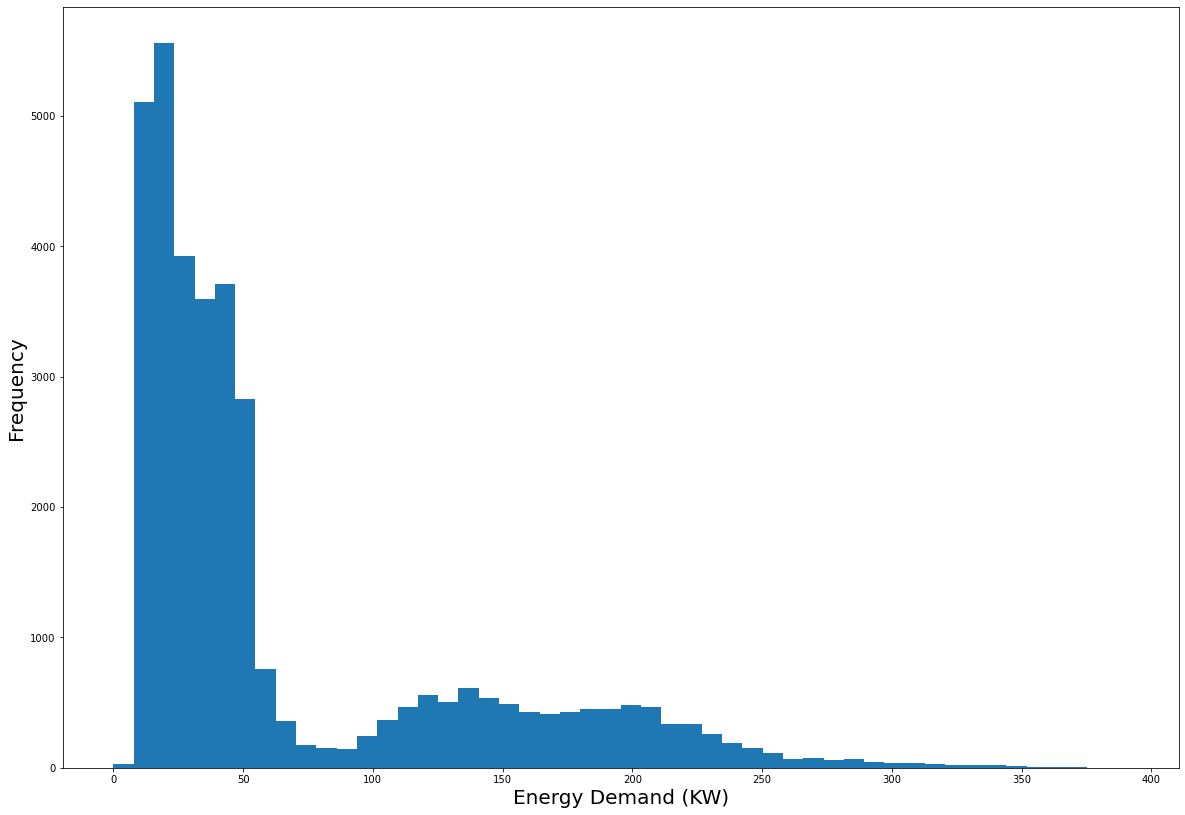

In [12]:
electric_load['C1'].hist(bins=50, alpha=1, grid=False, orientation='vertical')
plt.xlabel("Energy Demand (KW)", size=20)
plt.ylabel("Frequency", size=20)

Text(0, 0.5, 'Energy Demand (KW)')

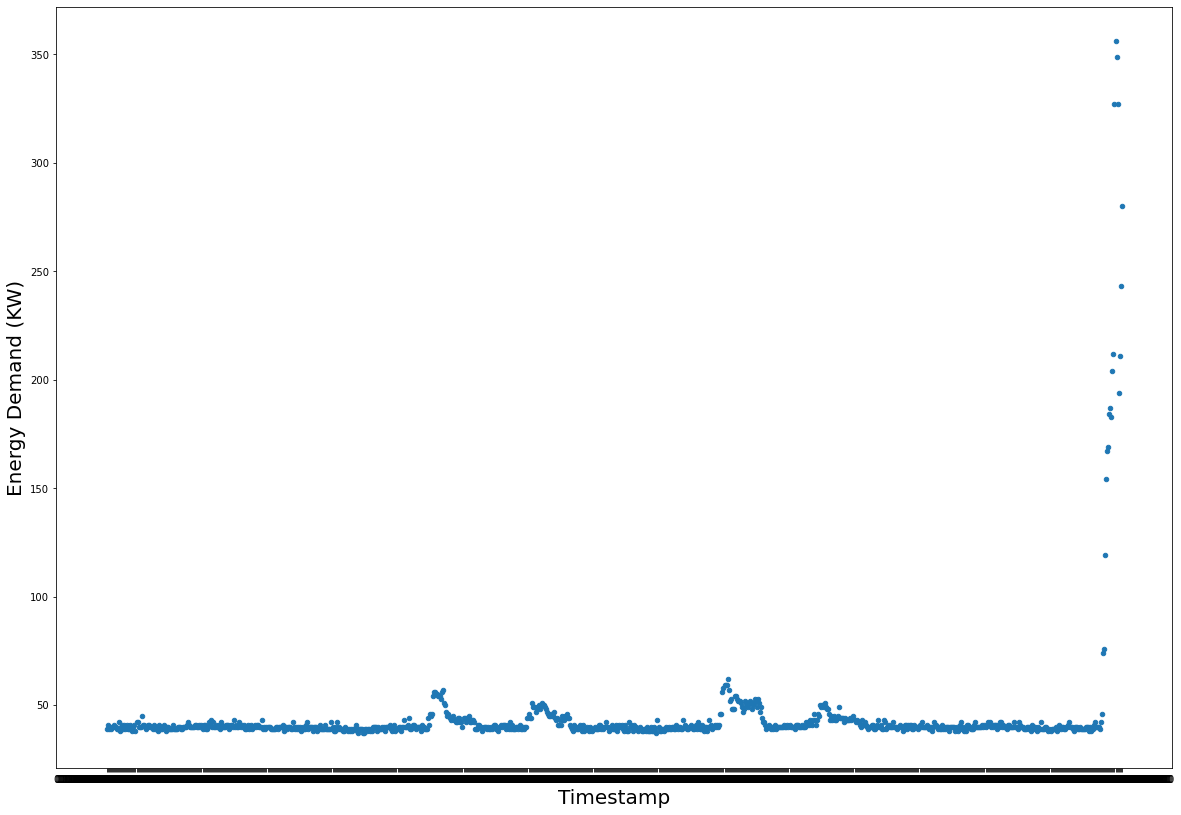

In [13]:
electric_load[0:1000].plot.scatter(x = 'Timestamp', y ='C1')
plt.xlabel("Timestamp", size=20)
plt.ylabel("Energy Demand (KW)", size=20)

Text(0, 0.5, 'Energy Demand (KW)')

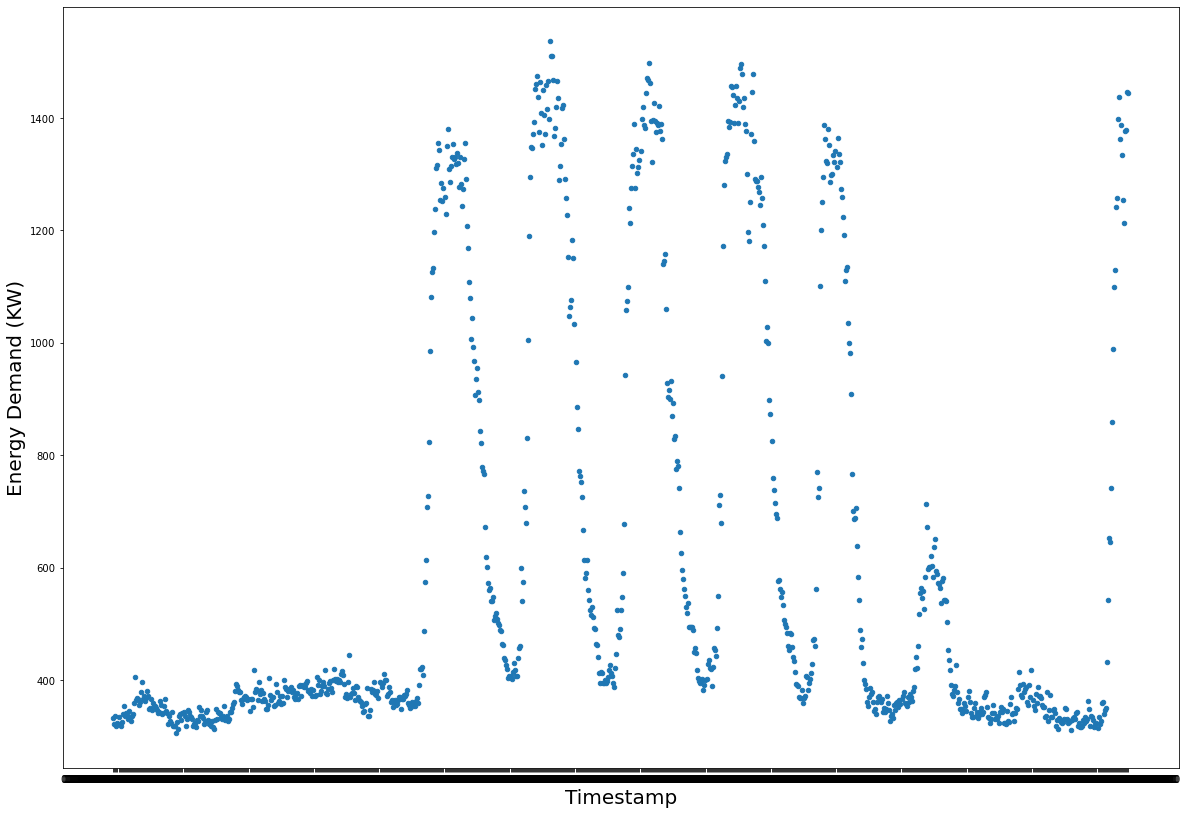

In [14]:
electric_load[0:1000].plot.scatter(x = 'Timestamp', y = 'C2')
plt.xlabel("Timestamp", size=20)
plt.ylabel("Energy Demand (KW)", size=20)

<AxesSubplot:>

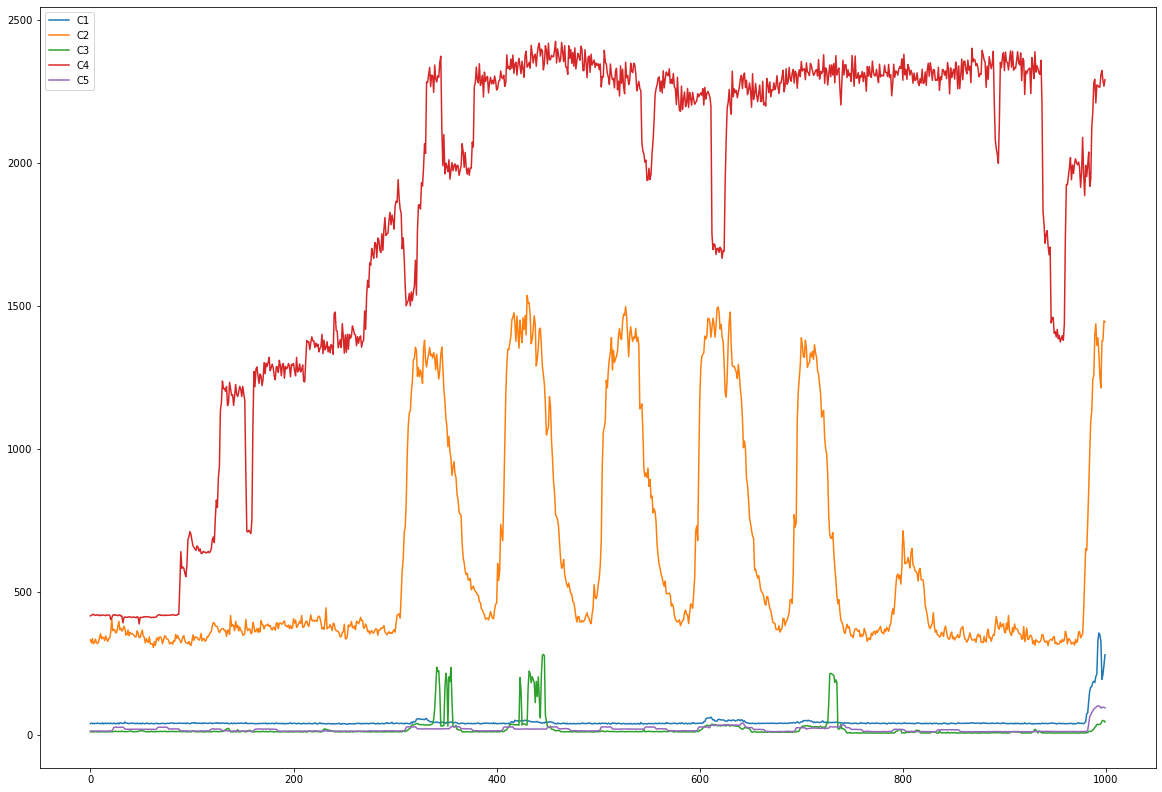

In [15]:
# Rolling mean average
rolling_mean = electric_load.iloc[0:1000,0:6].rolling(window=1).mean()
rolling_mean.plot()

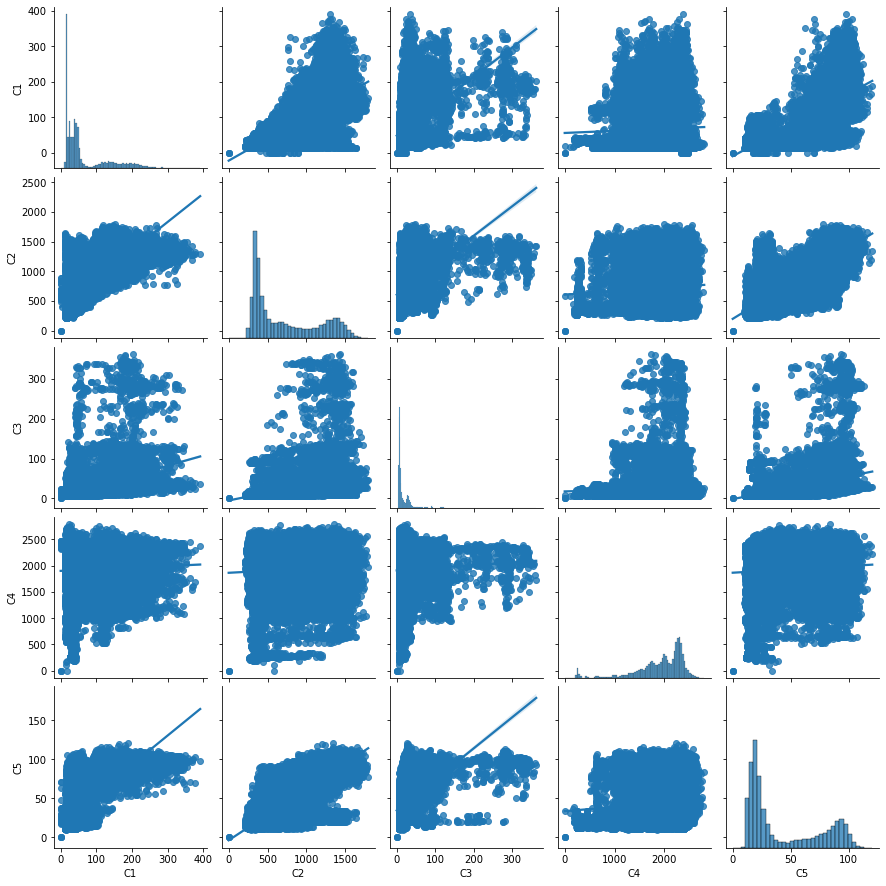

In [16]:
electric_load_sample=electric_load[['C1', 'C2', 'C3', 'C4', 'C5']]
sns.pairplot(data=electric_load_sample.dropna(), kind="reg")

<AxesSubplot:xlabel='C20', ylabel='Density'>

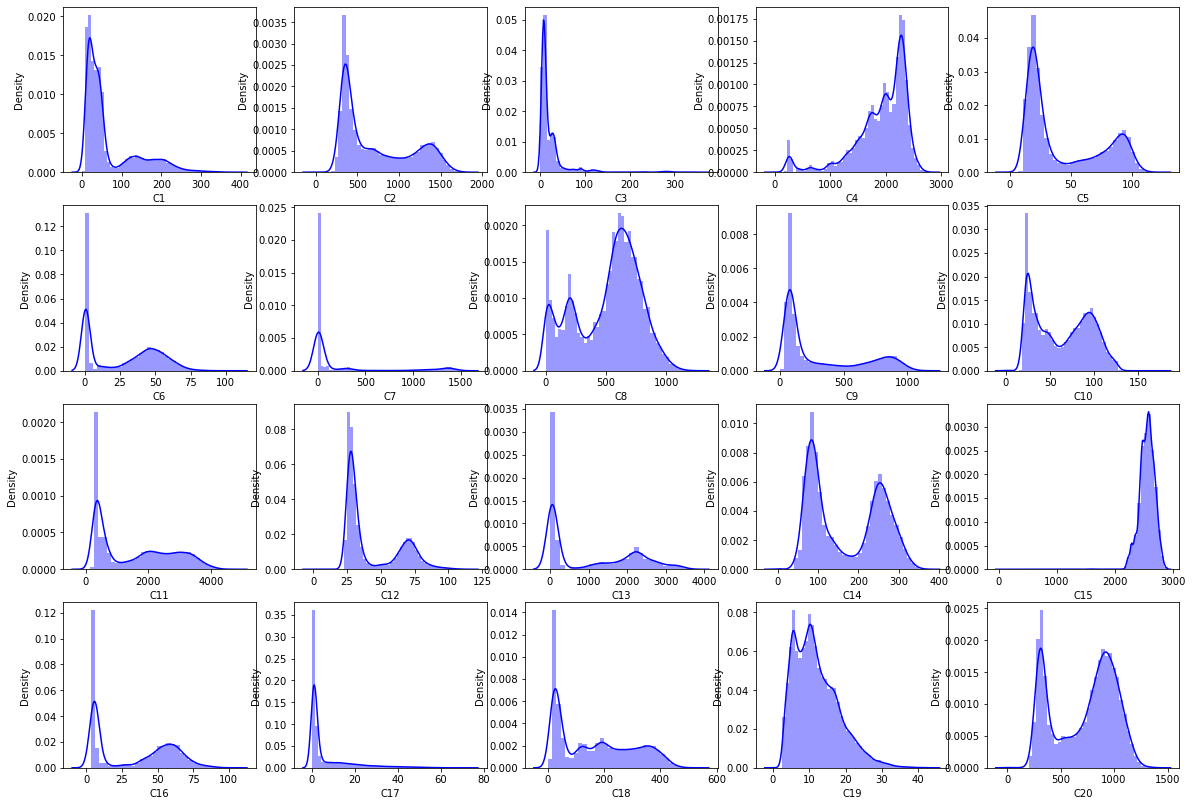

In [17]:
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10), (ax11, ax12, ax13, ax14, ax15), (ax16, ax17, ax18, ax19, ax20)) = plt.subplots(nrows=4, ncols=5)
sns.distplot(electric_load['C1'], kde=True, color="blue", ax=ax1)
sns.distplot(electric_load['C2'], kde=True, color="blue", ax=ax2)
sns.distplot(electric_load['C3'], kde=True, color="blue", ax=ax3)
sns.distplot(electric_load['C4'], kde=True, color="blue", ax=ax4)
sns.distplot(electric_load['C5'], kde=True, color="blue", ax=ax5)
sns.distplot(electric_load['C6'], kde=True, color="blue", ax=ax6)
sns.distplot(electric_load['C7'], kde=True, color="blue", ax=ax7)
sns.distplot(electric_load['C8'], kde=True, color="blue", ax=ax8)
sns.distplot(electric_load['C9'], kde=True, color="blue", ax=ax9)
sns.distplot(electric_load['C10'], kde=True, color="blue", ax=ax10)
sns.distplot(electric_load['C11'], kde=True, color="blue", ax=ax11)
sns.distplot(electric_load['C12'], kde=True, color="blue", ax=ax12)
sns.distplot(electric_load['C13'], kde=True, color="blue", ax=ax13)
sns.distplot(electric_load['C14'], kde=True, color="blue", ax=ax14)
sns.distplot(electric_load['C15'], kde=True, color="blue", ax=ax15)
sns.distplot(electric_load['C16'], kde=True, color="blue", ax=ax16)
sns.distplot(electric_load['C17'], kde=True, color="blue", ax=ax17)
sns.distplot(electric_load['C18'], kde=True, color="blue", ax=ax18)
sns.distplot(electric_load['C19'], kde=True, color="blue", ax=ax19)
sns.distplot(electric_load['C20'], kde=True, color="blue", ax=ax20)

In [18]:
electric_load.corr()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20
C1,1.000000,0.770012,0.458595,0.042916,0.811978,0.541170,0.681520,0.231104,0.779577,0.180587,0.422680,0.565965,0.574183,0.623963,0.178336,0.523744,0.846007,0.672672,0.589684,0.476969
C2,0.770012,1.000000,0.442427,0.068310,0.885724,0.653315,0.663020,0.380407,0.864374,0.326768,0.582817,0.795635,0.726498,0.807423,0.235077,0.649043,0.682835,0.794620,0.493988,0.606131
C3,0.458595,0.442427,1.000000,0.038583,0.478290,0.307224,0.426803,0.176782,0.502241,0.185418,0.277336,0.413164,0.355583,0.358710,0.053201,0.340421,0.442376,0.384011,0.339011,0.275945
C4,0.042916,0.068310,0.038583,1.000000,0.081653,0.135151,0.028410,0.205201,0.066648,0.004443,0.171810,0.058603,0.114627,0.120895,0.153375,0.084445,0.036201,0.125987,0.009214,0.191212
C5,0.811978,0.885724,0.478290,0.081653,1.000000,0.673534,0.688259,0.377933,0.920593,0.376080,0.574132,0.784529,0.752100,0.824015,0.280012,0.657564,0.735196,0.791146,0.549081,0.581100
C6,0.541170,0.653315,0.307224,0.135151,0.673534,1.000000,0.430907,0.468462,0.659287,0.257804,0.601875,0.578991,0.651645,0.748197,0.300768,0.665555,0.480353,0.694285,0.475311,0.591984
C7,0.681520,0.663020,0.426803,0.028410,0.688259,0.430907,1.000000,0.208107,0.734988,0.316498,0.343399,0.610078,0.449619,0.527800,0.158462,0.477396,0.584274,0.553512,0.344909,0.395575
C8,0.231104,0.380407,0.176782,0.205201,0.377933,0.468462,0.208107,1.000000,0.366762,-0.046043,0.542172,0.351416,0.394880,0.487690,0.230917,0.506265,0.208298,0.501906,0.245338,0.637795
C9,0.779577,0.864374,0.502241,0.066648,0.920593,0.659287,0.734988,0.366762,1.000000,0.394779,0.545058,0.844422,0.707802,0.777751,0.285691,0.652187,0.737229,0.772031,0.534076,0.567488
C10,0.180587,0.326768,0.185418,0.004443,0.376080,0.257804,0.316498,-0.046043,0.394779,1.000000,0.152517,0.470487,0.436892,0.411571,0.144956,0.176398,0.187950,0.225499,0.087849,-0.011037


<AxesSubplot:>

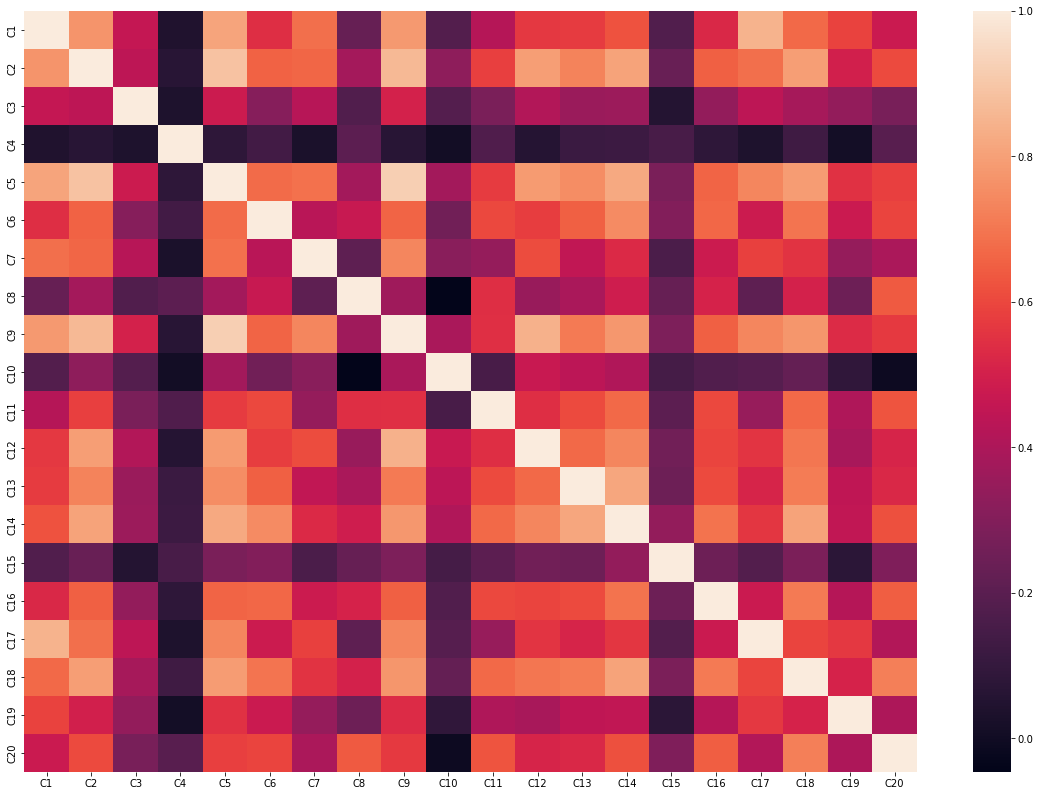

In [19]:
sns.heatmap(electric_load.corr())

<AxesSubplot:>

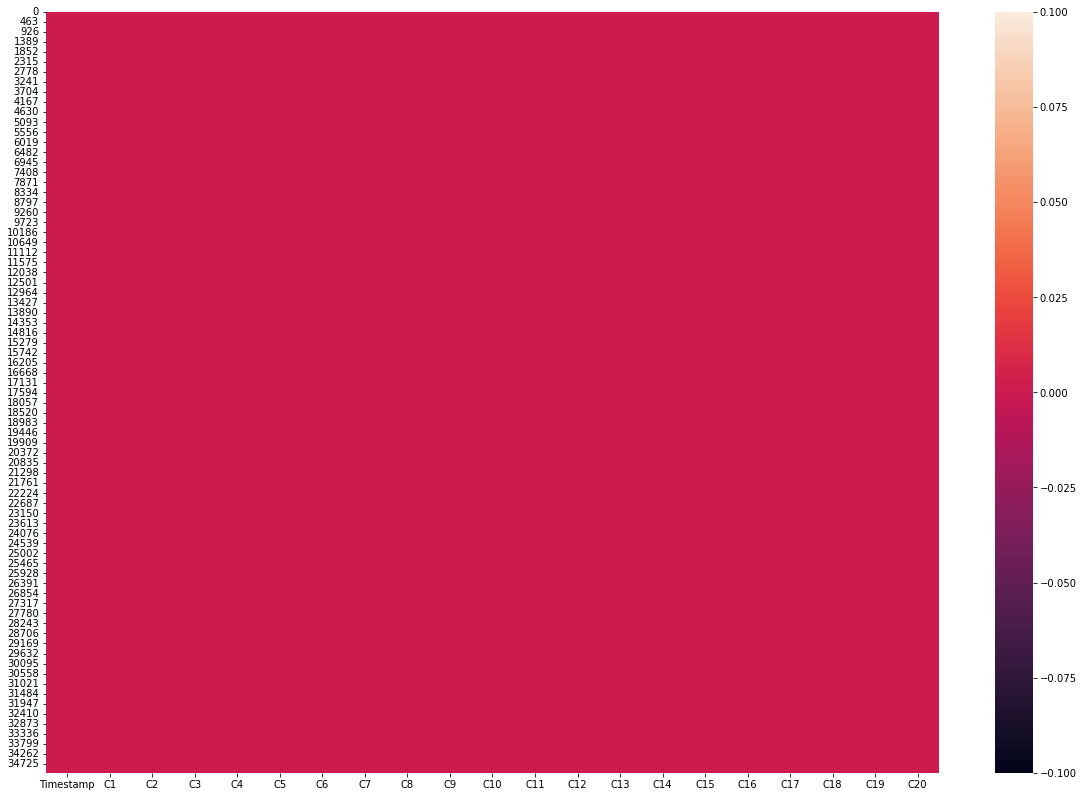

In [20]:
# missing info, it appears that there is no missing data
sns.heatmap(electric_load.isna())

<AxesSubplot:>

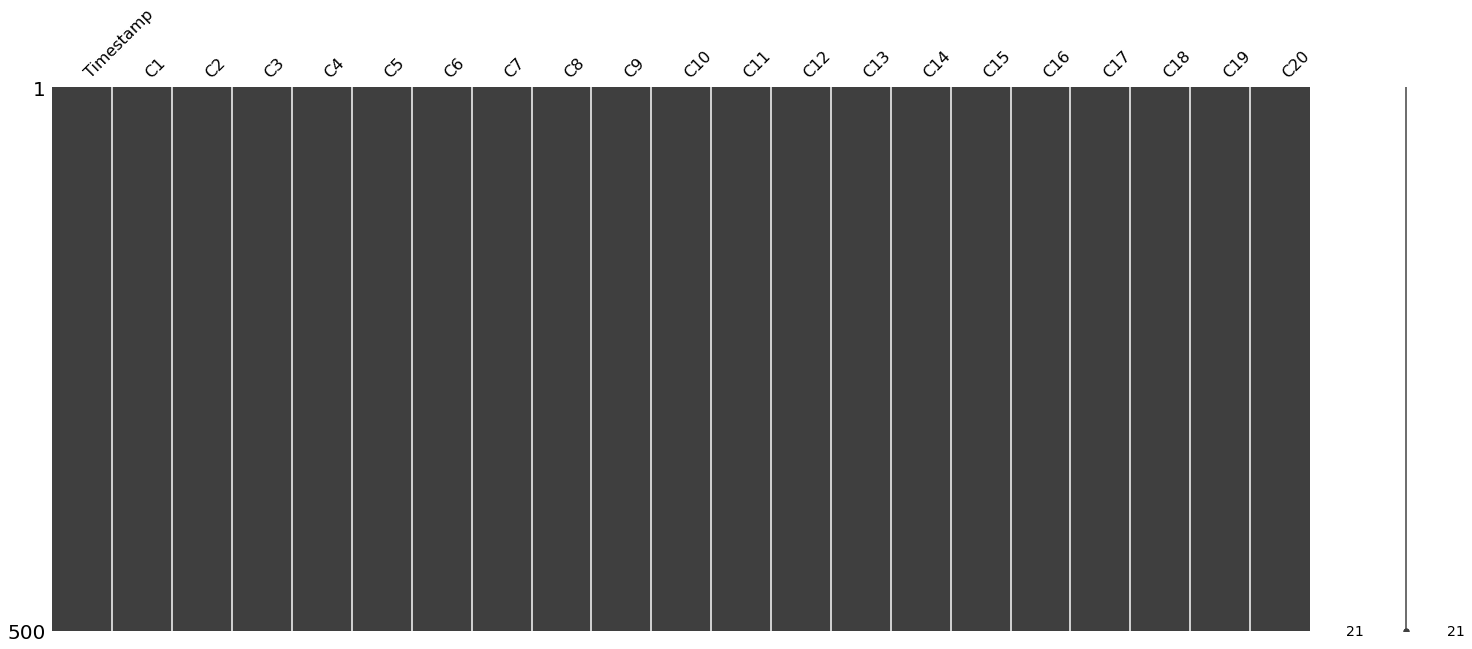

In [21]:
# Matrix of missingness of the data, it appears that there is no missing data
msno.matrix(electric_load.sample(500))

Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point. Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. Skewness for normal distribution should be zero. Negative skewness indicates skew left and positive skewness indicates skew right. Kurtosis is zero for a normal distribution and can only be postive.

In [22]:
# Skewness 
electric_load[['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19','C20']].apply(scipy.stats.skew)

C1     1.526196
C2     0.685705
C3     5.017861
C4    -1.563728
C5     0.697135
C6     0.129717
C7     2.189887
C8    -0.412949
C9     0.951702
C10    0.116817
C11    0.386706
C12    0.864928
C13    0.514218
C14    0.169149
C15   -1.598064
C16    0.154801
C17    2.273114
C18    0.383227
C19    0.895463
C20   -0.317230
dtype: float64

In [23]:
# Kurtosis
electric_load[['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19','C20']].apply(scipy.stats.kurtosis)

C1      1.374807
C2     -1.038233
C3     30.625283
C4      2.609186
C5     -1.191385
C6     -1.506735
C7      3.140385
C8     -0.805620
C9     -0.730487
C10    -1.403829
C11    -1.316276
C12    -0.793692
C13    -1.339764
C14    -1.588971
C15    18.972547
C16    -1.598271
C17     4.882908
C18    -1.220536
C19     0.716522
C20    -1.291171
dtype: float64

Here are steps to detect outliers in the dataset:

1. Arrange all the dataset points and calculate median
2. Calculate the upper quartile
3. Calculate the lower quartile
4. Calculate the interquartile range
   
- Product of numeric value of 1.5 and difference of the upper quartile(75%) and lower quartile(25%)
- 1.5 X (Upper Quartile - Lower Quartile)

5. Calculate the inner fences for the dataset

- Set of numerical boundaries which is classified as major and minor outlier:
- Major Outlier = Upper Quartile + Interquartile Range
- Minor Outlier = Lower Quartlie - Interquartile Range

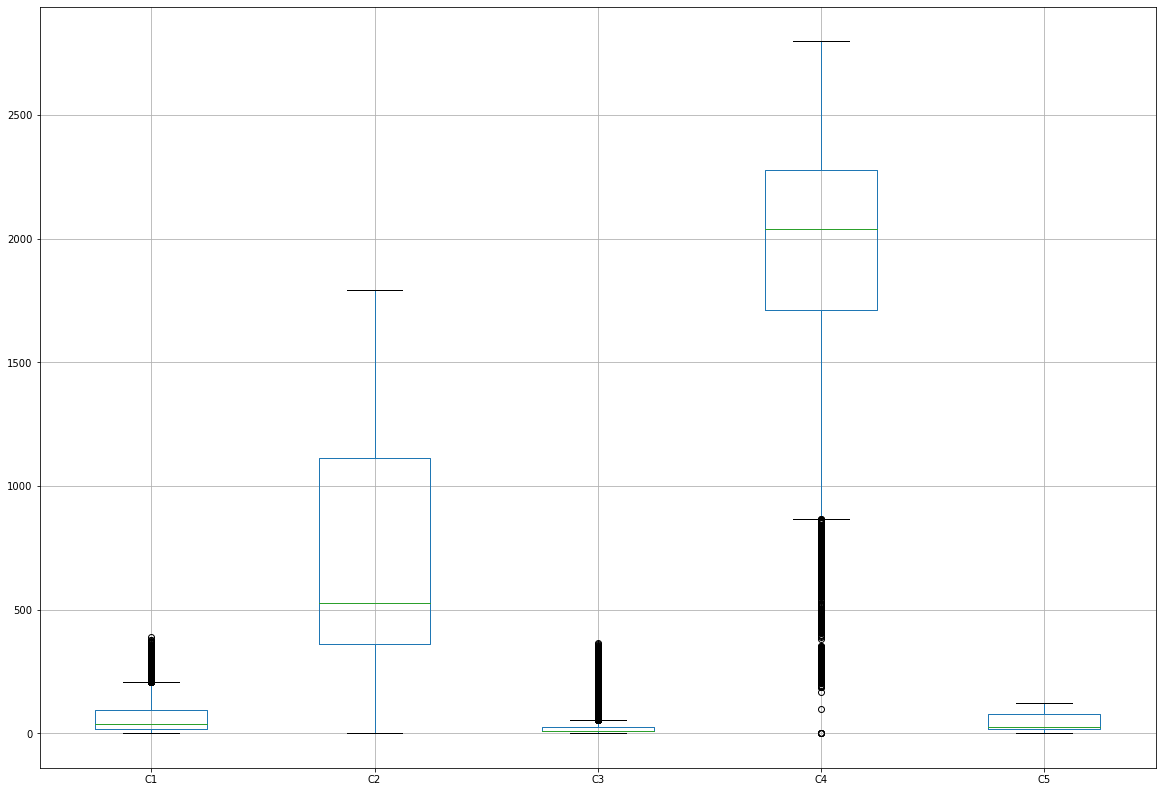

In [24]:
electric_load.boxplot(column=['C1', 'C2', 'C3', 'C4', 'C5'])
plt.show()

In [25]:
electric_load_describe = electric_load.describe().T
electric_load_describe['Interquartile Range'] = 1.5*(electric_load_describe['75%'] - electric_load_describe['25%'])

In [26]:
electric_load_describe['Major Outlier'] = (electric_load_describe['75%'] + electric_load_describe['Interquartile Range'])
electric_load_describe['Minor Outlier'] = (electric_load_describe['25%'] - electric_load_describe['Interquartile Range'])

In [27]:
electric_load_describe

,count,mean,std,min,25%,50%,75%,max,Interquartile Range,Major Outlier,Minor Outlier
C1,35140.0,66.734206,68.058885,0.0,19.000,39.000,94.000,391.000,112.500,206.500,-93.500
C2,35140.0,720.331137,420.748288,0.0,360.000,525.960,1112.220,1793.520,1128.330,2240.550,-768.330
C3,35140.0,23.040545,37.611517,0.0,7.252,9.800,26.348,362.948,28.644,54.992,-21.392
C4,35140.0,1921.403369,489.240731,0.0,1712.000,2038.400,2276.000,2797.600,846.000,3122.000,866.000
C5,35140.0,43.591540,31.251058,0.0,18.560,25.280,76.560,120.320,87.000,163.560,-68.440
C6,35140.0,27.301786,24.514409,0.0,0.480,31.920,48.840,105.960,72.540,121.380,-72.060
C7,35140.0,191.985604,415.773350,0.0,6.000,8.000,54.000,1524.004,72.000,126.000,-66.000
C8,35140.0,514.810017,266.393689,0.0,280.000,580.000,708.000,1252.000,642.000,1350.000,-362.000
C9,35140.0,310.068014,317.978625,0.0,76.000,118.000,594.000,1136.000,777.000,1371.000,-701.000
C10,35140.0,63.546314,31.649928,0.0,31.560,63.600,92.400,174.960,91.260,183.660,-59.700


Text(0.5, 1.0, 'Energy Consumption of 20 SMEs For Year 2016')

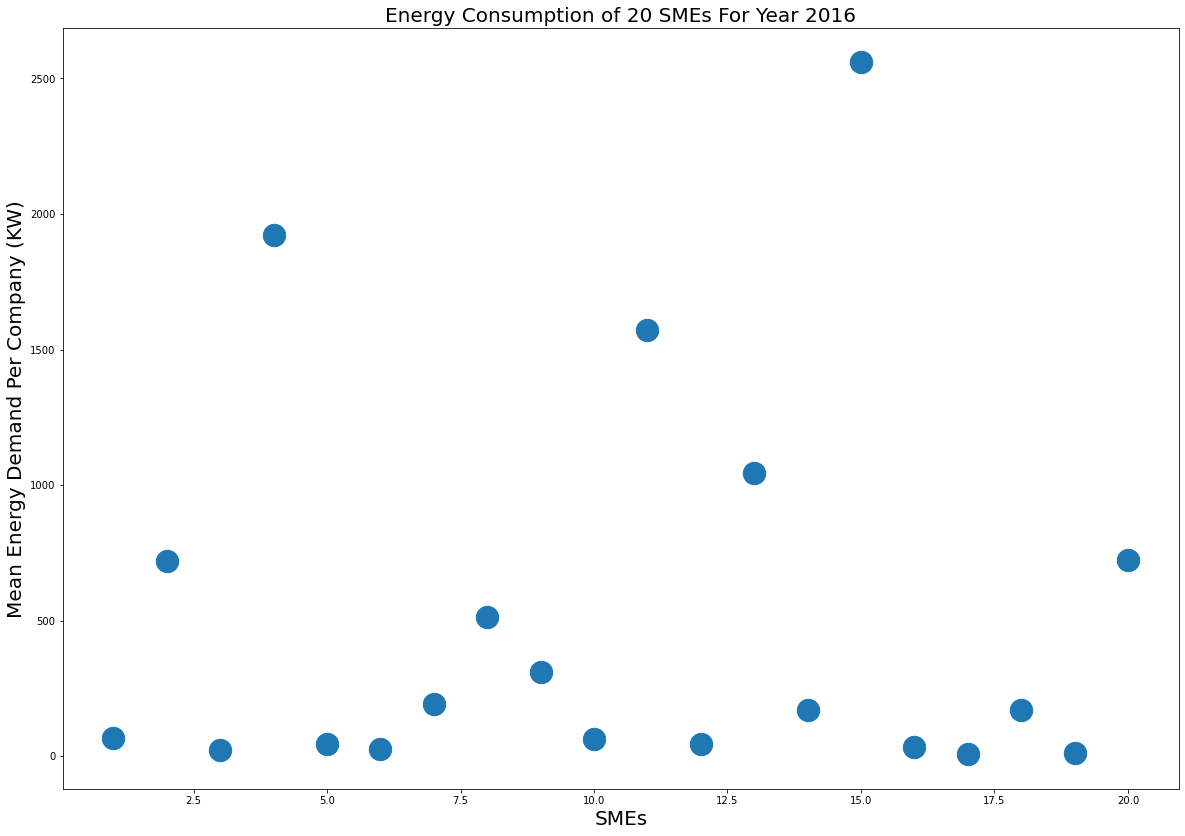

In [28]:
a = np.linspace(1, 20, 20)
plt.scatter(a, electric_load_describe['mean'], s=500)
plt.xlabel("SMEs", size=20)
plt.ylabel("Mean Energy Demand Per Company (KW)", size=20)
plt.title("Energy Consumption of 20 SMEs For Year 2016", size=20)

From above detailed scatter plot, it becomes clear that there are only 6 out of 20 SMEs which have mean energy demand greater than 500 KW for year 2016. So, probably out of these 20 companies only 6 companies might be considered medium sized enterprises. Rest of the 14 are small sized companies.